In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from in2stellar import Tracks, DenseNetworkGrid, set_seed
from interstellar import Tracks, DenseNetworkGrid, set_seed
%matplotlib inline

Load tracks with new MLT 2.5 grid

In [2]:
path = '/rds/projects/d/daviesgr-cartography/mesa_grid/grid2_zams_agb/simple_grid_alex/'

In [3]:
tracks = Tracks(name='tracks_04b')

In [4]:
tracks.add_metadata(path)
tracks.get_metadata()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.00,0.24,-0.10,2.3,0.0,1
1,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.94,0.32,0.00,2.5,0.0,1
2,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.92,0.28,-0.30,1.7,0.0,1
3,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.91,0.32,0.00,2.5,0.0,1
4,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.01,0.30,-0.10,2.5,0.0,1
...,...,...,...,...,...,...,...
16079,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.84,0.28,-0.40,1.7,0.0,1
16080,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.13,0.26,0.10,2.1,0.0,1
16081,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.85,0.26,0.25,1.5,0.0,1
16082,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.10,0.28,-0.40,1.7,0.0,1


In [5]:
from interstellar.tracks import DATA_COLS

print(DATA_COLS)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit']


In [6]:
cols = DATA_COLS + ['surface_he4', 'surface_Z']
print(cols)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit', 'surface_he4', 'surface_Z']


In [7]:
tracks.load_data(usecols=cols)
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
0,0,1.0,0.24,-0.1,2.3,1.0,0.000117,0.000013,4645.111846,9.102513,4.664952,3.100195,0.239966,0.010769,-0.100123,12.421090
1,0,1.0,0.24,-0.1,2.3,1.0,0.000121,0.000013,4646.796973,8.869433,4.601499,3.112091,0.239967,0.010769,-0.100117,12.685399
2,0,1.0,0.24,-0.1,2.3,1.0,0.000125,0.000014,4647.737730,8.690322,4.552957,3.121302,0.239968,0.010769,-0.100103,12.894007
3,0,1.0,0.24,-0.1,2.3,1.0,0.000128,0.000014,4648.474193,8.553160,4.515453,3.128487,0.239969,0.010770,-0.100092,13.059153
4,0,1.0,0.24,-0.1,2.3,1.0,0.000130,0.000014,4649.057912,8.443823,4.485372,3.134292,0.239969,0.010770,-0.100084,13.194113


In [8]:
zx_sun = 0.0181

zx = 10.0**tracks.get_data('initial_feh') * zx_sun

tracks._data['initial_Zinit'] = (1.0 - tracks.get_data('initial_Yinit')) / (1.0 + 1.0/zx)

Note, evo_stage incorrectly defined. Instead we choose to cut the data given a fractional age above 0.01

In [9]:
condition = tracks.get_data('frac_age') > 0.01
tracks.select_data(condition)

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit
423,1,1.00,0.24,-0.1,2.3,1.000000,0.101718,0.011245,5761.769950,0.750791,0.870776,4.558076,0.239467,0.010753,-0.101076,166.231104,0.010772
424,1,1.00,0.24,-0.1,2.3,1.000000,0.115514,0.012770,5762.374620,0.752437,0.871547,4.557307,0.239379,0.010749,-0.101265,166.011292,0.010772
425,1,1.00,0.24,-0.1,2.3,1.000000,0.132069,0.014600,5762.941699,0.754108,0.872343,4.556515,0.239273,0.010745,-0.101491,165.785809,0.010772
426,1,1.00,0.24,-0.1,2.3,1.000000,0.151936,0.016796,5763.497113,0.755837,0.873174,4.555688,0.239144,0.010740,-0.101767,165.551124,0.010772
427,1,1.00,0.24,-0.1,2.3,1.000000,0.175776,0.019431,5764.093057,0.757678,0.874056,4.554811,0.238991,0.010735,-0.102098,165.302955,0.010772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16570536,2,1.12,0.32,0.1,1.9,1.117182,5.160961,1.300383,5016.261144,4.292697,2.747032,3.608286,0.315549,0.014960,0.092133,31.403249,0.015150
16570537,2,1.12,0.32,0.1,1.9,1.117176,5.162723,1.300827,5014.258156,4.313443,2.755862,3.605496,0.315549,0.014960,0.092133,31.249675,0.015150
16570538,2,1.12,0.32,0.1,1.9,1.117170,5.164464,1.301265,5012.440330,4.333759,2.764348,3.602823,0.315685,0.014962,0.092283,31.096966,0.015150
16570539,2,1.12,0.32,0.1,1.9,1.117164,5.166181,1.301698,5010.615529,4.354397,2.772941,3.600125,0.315755,0.014963,0.092359,30.952028,0.015150


In [10]:
tracks.select_data(condition, inplace=True)

In [11]:
x_cols = ['frac_age', 'initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit', 'initial_Zinit']
y_cols = ['star_age', 'effective_T', 'radius', 'delta_nu_fit', 'star_feh', 'surface_he4', 'surface_Z']

## Preprocessing

### Gradient

We will not be using all the data in training, because we want to have preference to data where there is high change it observables. A simple way to do this is to calculate the gradient in logg and teff for each track. We may then use this as the weights when randomly sampling the full set of tracks. For this to be effective, we need to sample a smaller number of models then the total, effectively dropping points where the gradient is low since these will be more easily learnt by the neural network.

In [12]:
def gradient(track, logg_sun=4.44, teff_sun=5777.0):
    return ((np.gradient(track['effective_T'] / teff_sun))**2.0 + \
                  (np.gradient(track['log_g'] / logg_sun))**2.0)**0.5

In [13]:
grouped = tracks._data.groupby(by=['initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit'])

for name, group in grouped:
    tracks._data.loc[group.index, 'gradient'] = gradient(group)

In [14]:
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,gradient
423,1,1.0,0.24,-0.1,2.3,1.0,0.101718,0.011245,5761.769950,0.750791,0.870776,4.558076,0.239467,0.010753,-0.101076,166.231104,0.010772,0.000202
424,1,1.0,0.24,-0.1,2.3,1.0,0.115514,0.012770,5762.374620,0.752437,0.871547,4.557307,0.239379,0.010749,-0.101265,166.011292,0.010772,0.000203
425,1,1.0,0.24,-0.1,2.3,1.0,0.132069,0.014600,5762.941699,0.754108,0.872343,4.556515,0.239273,0.010745,-0.101491,165.785809,0.010772,0.000207
426,1,1.0,0.24,-0.1,2.3,1.0,0.151936,0.016796,5763.497113,0.755837,0.873174,4.555688,0.239144,0.010740,-0.101767,165.551124,0.010772,0.000216
427,1,1.0,0.24,-0.1,2.3,1.0,0.175776,0.019431,5764.093057,0.757678,0.874056,4.554811,0.238991,0.010735,-0.102098,165.302955,0.010772,0.000233


Below we can see many points have a small gradient.

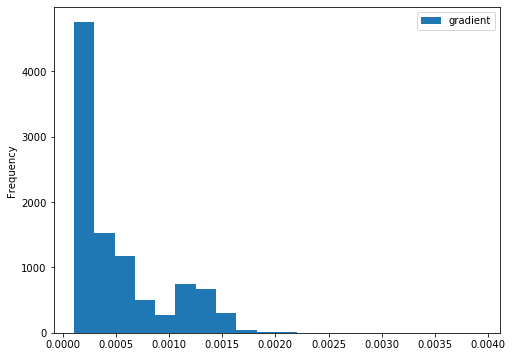

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
tracks._data.sample(n=10000).plot(kind='hist', ax=ax, y='gradient', bins=20)

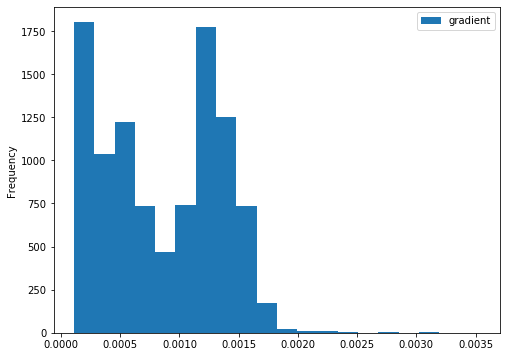

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
tracks._data.sample(n=10000, weights='gradient').plot(kind='hist', ax=ax, y='gradient', bins=20)

In [17]:
print('Length = ', len(tracks._data))

Length =  9669666


In [18]:
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,gradient
423,1,1.0,0.24,-0.1,2.3,1.0,0.101718,0.011245,5761.769950,0.750791,0.870776,4.558076,0.239467,0.010753,-0.101076,166.231104,0.010772,0.000202
424,1,1.0,0.24,-0.1,2.3,1.0,0.115514,0.012770,5762.374620,0.752437,0.871547,4.557307,0.239379,0.010749,-0.101265,166.011292,0.010772,0.000203
425,1,1.0,0.24,-0.1,2.3,1.0,0.132069,0.014600,5762.941699,0.754108,0.872343,4.556515,0.239273,0.010745,-0.101491,165.785809,0.010772,0.000207
426,1,1.0,0.24,-0.1,2.3,1.0,0.151936,0.016796,5763.497113,0.755837,0.873174,4.555688,0.239144,0.010740,-0.101767,165.551124,0.010772,0.000216
427,1,1.0,0.24,-0.1,2.3,1.0,0.175776,0.019431,5764.093057,0.757678,0.874056,4.554811,0.238991,0.010735,-0.102098,165.302955,0.010772,0.000233


In [19]:
tracks._data.drop(columns='star_mass', inplace=True)  # Drop star mass as not needed here

Reduce size by converting to 32-bit float.

In [21]:
float_cols = tracks._data.select_dtypes(float).columns

tracks._data[float_cols] = tracks._data.loc[:, float_cols].astype(np.float32)

In [22]:
tracks._data['initial_mass']

423         1.00
424         1.00
425         1.00
426         1.00
427         1.00
            ... 
16570536    1.12
16570537    1.12
16570538    1.12
16570539    1.12
16570540    1.12
Name: initial_mass, Length: 9669666, dtype: float32

In [27]:
save_path = '/rds/projects/d/daviesgr-alex-phd/interstellar_data/tracks_04b'

tracks.save(save_path)